

# Create my own metrics

### MAE (Mean Absolut Error)

- For each point there is a possible error. 
     - Error = X-Xprediction.
     
     
- All errors in absolut value and then summed and divided by the total.
- MSE is All errors squared and then summed and divided by the total.
- The mean of all those errors is called MAE in absolut value.


- Use : 
    - Error importance is linear with his amplitude.
    - If data set contain outliers.Not sensitive of outliers.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [4]:
y=np.array([1,2])
y_pred=np.array([2,2])
print('MAE :',mean_absolute_error(y,y_pred))


MAE : 0.5


## MSE (Mean Absolut Error)


- For each point there is a possible error. 
  - Error = X-Xprediction.
  
  
- MSE is All errors squared and then summed and divided by the total.
- The mean of all those errors is called MAE in absolut value.

- Use: 
    - Exponential importance of the error , big importance to the big error.
    - Big MSE for outliers sot not really god.

In [5]:
print('MSE :',mean_squared_error(y,y_pred))


MSE : 0.5


## RMSE (Root Mean Square Error)

- All errors in absolut value and then summed and divided by the total.
- All of that under a square root.



In [6]:
print('RMSE :',np.sqrt(mean_squared_error(y,y_pred)))

RMSE : 0.7071067811865476


## Median Absolute Error

- The median absolute error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.


- Median of (y-ypred)
    - So even if there is a big error , the Median is taking . 


In [7]:
y=np.array([1,2,2,3,5,2])
y_pred=np.array([5,2,2,5,7,1000])
print('Median Absolute Error :',median_absolute_error(y,y_pred))


Median Absolute Error : 2.0


# Distributing all of these errors is a better way to analyze errors

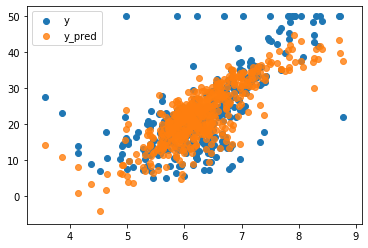

In [8]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston=load_boston()
x=boston.data
y=boston.target

model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)

plt.scatter(x[:,5],y,label='y')
plt.scatter(x[:,5],y_pred,alpha=0.8,label='y_pred')
plt.legend()


## Plot the error histogram

    - Our errors are following an exponential distribution.

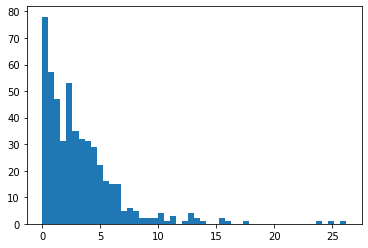

In [9]:
err_hist=np.abs(y-y_pred)
plt.hist(err_hist,bins=50)
plt.show()

# Coefficient of determination / Score methode



-  For the linear regression models, it is the coefficient R ^ 2 which is implemented in the method.
    
- In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
    
- Evaluates the performance (errors) of the model compared to the level of variation present in the data.
    
- Our model predicts n % of variations.

 - R2=1-SUM[(y-y_pred)^2]/SUM[(y-moyenne(y))^2]=n%
 
    - (y-y_pred)^2
       - Quadratic error
  
    - (y-mean(y))^2  
         - Variance
         
         
- If the errors are equal to the variance of the data the model is bad. (1-1 = 0)

In [10]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston=load_boston()
x=boston.data
y=boston.target

model=LinearRegression()
model.fit(x,y)
model.score(x,y)

0.7406426641094095

- Our model predicts 74% of the real estate price variations in Boston.

# Error metric in cross validation

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y,cv=5,scoring= 'r2')

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [12]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']